In [1]:
import string, re, json, pickle, warnings, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# importing the wordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bidi.algorithm import get_display
import arabic_reshaper
from data_preparation import take_a_shower, clean_content_aravec

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/offensive_dataset.csv', encoding="utf-16")
data.head()

,Comment,is_off
0,شوف حد ين*** أنت و إيران.,1
1,شوف تيفي قوداتها مع الجن غي بلاتي يجي من مكة,0
2,عجب يتفاوظون على شعوب عربية وعليهم وهىلا تعلم,0
3,ههههههه هاد شوف تيفي اللي حطت عليه مشا فيها,0
4,الرزق يأتي من حيث لا تدري 🙌🏻❤️,0


<Figure size 576x432 with 0 Axes>

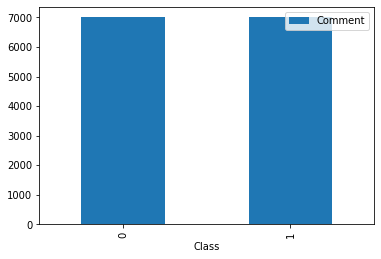

In [3]:
fig = plt.figure(figsize=(8,6))
data.groupby('is_off').count().plot.bar(xlabel='Class')
plt.show()

In [4]:
data.Comment = data.Comment.apply(take_a_shower)
data.shape

(14000, 2)

In [5]:
data.head()

,Comment,is_off
0,شوف حد ايران,1
1,شوف تيفي قوداتها الجن غي بلاتي يجي مكه,0
2,عجب يتفاوظون شعوب عربيه وعليهم وهيلا تعلم,0
3,هه هاد شوف تيفي اللي حطت مشا,0
4,الرزق ياتي تدري 🙌🏻❤️,0


In [5]:
comments = ' '.join(list(data.Comment))
comments[0:1000]

'شوف حد ايران شوف تيفي قوداتها الجن غي بلاتي يجي مكه عجب يتفاوظون شعوب عربيه وعليهم وهيلا تعلم هه هاد شوف تيفي اللي حطت مشا الرزق ياتي تدري 🙌🏻❤️ دخلو سوق كركم شوفو شكون مكتب عليكم تعيشو عبيد فقراء معا لسسه امبارح بحذركو ولاد الجزمه فيفي ولاد شرموطه هه😂  الله يعفو مسكينه دغيا طارو سصحاب الحسنات باش يستغلوها حرام عليهو الله يخد الحق شوف تفي عواد متسترها شهراتها لناس تفو شحاال حامضه هاد سعييده معرفت علاه كيجيبوها فين ميكون هاد لموسم ديال طنطان يجيبوها لينا يالطيف حد مكيحملها الطلب السعودي جاء ردا الاتهامات الاسراءيليه للسعوديه بقتل الاطفال باليمن اسوه بقتل اسراءيل للاطفال الفلسطينيين جاء تقرير المتحده بلاش فقره الاهداءات وادا لابد خليها نهايه الفيديو احسن وبالتوفيق ياعمر يااربي يااربي تلطف بينا نجم كندا هه روبيني الخرا هه اللهم اشغلهم بانفسهم واجعل كيدهم نحرهم واجعل تدبيرهم تدميرهم ودمرهم تدميرا ومزقهم شر ممزق قوي متين الله ماشي سيمحمد خصها تسميك سوسو المتوحشه 🤣🤣 😂 اين تعليقي ياجزيره اعتقد المنطق الكلام توجد اساء وانما تعقيب كلام امير دوله قطر بتايده بموضوع التطرف الله اسهل عليكم بكيتيني 

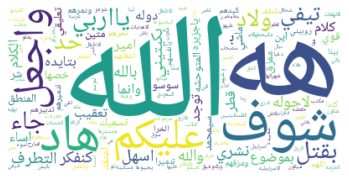

<Figure size 1440x720 with 0 Axes>

In [12]:
# handling arabic text
comments = arabic_reshaper.reshape(comments)
comments = get_display(comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [13]:
offensive_comments = ' '.join(list(data.Comment.loc[data['is_off'] == 1]))
offensive_comments[0:1000]

'شوف حد ايران دخلو سوق كركم شوفو شكون مكتب عليكم تعيشو عبيد فقراء معا لسسه امبارح بحذركو ولاد الجزمه فيفي ولاد شرموطه هه😂 الله يعفو مسكينه دغيا طارو سصحاب الحسنات باش يستغلوها حرام عليهو الله يخد الحق شوف تفي عواد متسترها شهراتها لناس تفو شحاال حامضه هاد سعييده معرفت علاه كيجيبوها فين ميكون هاد لموسم ديال طنطان يجيبوها لينا يالطيف حد مكيحملها نجم كندا هه روبيني الخرا هه لاحوله بالله كنفكر نشري بقره ونستافذ تفو كمامر لينعل اشطر انك تعليقي مختصر لكل امه زباله وهءلاء زباله السنه اغلب نزحوا كانوا كلاب للحكومه الصفويه الله ناصر جنده وخاذل المرتدين 👎 بالطبع وحكم عسكر الانجليز لمصر واللي مجتمع بمقره البانتاغون ليله سقوط العميل السارق مبارك الله فاش لمار كتهضر فالحق كيكولو انت ناقصه عقل والا غلطات كيردوها مولات لعقل مجتمع منافق متناقض حرامي والمشكل محامي حسرتاه وداير لمنكر التقيه دين الرافضه العب غيرها هه لوين معقول ستر بنت ناس معمرك تخيب اولدي دير قناه ديالك نتي ومرتك وحني طلب را عندك موهبه زوينه تستحق الدفن الرجم محاميه الكسوله بنت لحرام حسبي الله الوكيل الله يقطع الرجال دنيا فحال والله ينعل

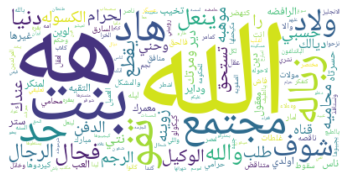

<Figure size 1440x720 with 0 Axes>

In [20]:
# handling arabic text
offensive_comments = arabic_reshaper.reshape(offensive_comments)
offensive_comments = get_display(offensive_comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(offensive_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [21]:
not_offensive_comments = ' '.join(list(data.Comment.loc[data['is_off'] == 0]))
len(not_offensive_comments)

405008

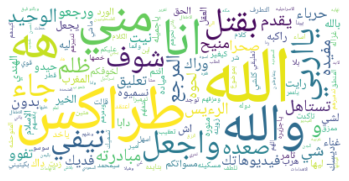

<Figure size 1440x720 with 0 Axes>

In [27]:
# handling arabic text
not_offensive_comments = arabic_reshaper.reshape(not_offensive_comments)
not_offensive_comments = get_display(not_offensive_comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(not_offensive_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

# LSTM + AraVec Embedding

In [5]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelEncoder
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
import gensim

In [6]:
# 60% - train set,
# 20% - validation set,
# 20% - test set
train, validate, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

print(train.shape)
print(validate.shape)
print(test.shape)

X_train = train.Comment
Y_train = train.is_off

X_validate = validate.Comment
Y_validate = validate.is_off

X_test = test.Comment
Y_test = test.is_off

(8400, 2)
(2800, 2)
(2800, 2)


In [8]:
X_validate

5231                                   الله يعطيكم الدل 👊👊
2076                                          هه كول والله
4103     الجزيره مناره الاعلام الحر مووتو بغيضكم ياخونه...
7493     بلد عربي بحترمه وبحترم اهله الاردن الشقيق ❤️ ا...
5968     واش هد اليوتيب معندوش رقابه خصكم ترباو هد اسلو...
                               ...                        
10681                                      عاهيره بوراقيها
13611    تحدث مخالفات مذابح شريك للان مرسي دعاكم انتخاب...
13361    وين دول الخليج الجربانه متخمه بالاموال تسسقبل ...
5510     شكله مستر بلحه يبغانا نجيب اله زمن نوديه <NUM>...
5330     يعني تجنب التوجه للمساجد يعني نخلي بيت ربنا عش...
Name: Comment, Length: 2800, dtype: object

In [27]:
c = 0
for sen in X_train:
    c += len(sen.split())
print(c)

106988


In [28]:
c = 0
for sen in X_validate:
    c += len(sen.split())
print(c)

35224


In [29]:
c = 0
for sen in X_test:
    c += len(sen.split())
print(c)

35046


In [7]:
aravec_model = gensim.models.Word2Vec.load('bin/aravec/tweets_sg_100')

In [8]:
# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
arvec_weights = aravec_model.wv.vectors
MAX_NB_WORDS, embedding_size = arvec_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(MAX_NB_WORDS, embedding_size))

Vocabulary Size: 331679 - Embedding Dim: 100


In [30]:
MAX_SEQUENCE_LENGTH = 461 #176 # based on our inputs; TODO: remove outliers? dynamically calculate!
EMBEDDING_DIM = 100 # w2v, fastText; GloVe=50
MAX_NB_WORDS = 200000

In [31]:
tokenize = Tokenizer(num_words=MAX_NB_WORDS)
tokenize.fit_on_texts(X_train)
train_sequences = tokenize.texts_to_sequences(X_train)
train_word_index = tokenize.word_index
print('Found %s unique tokens.' % len(train_word_index))
x_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_train = np.asarray(Y_train)

print(x_train.shape)
print(y_train.shape)

Found 37076 unique tokens.
(8400, 461)
(8400,)


In [32]:
tokenize = Tokenizer(num_words=MAX_NB_WORDS)
tokenize.fit_on_texts(X_validate)
val_sequences = tokenize.texts_to_sequences(X_validate)
val_word_index = tokenize.word_index
print('Found %s unique tokens.' % len(val_word_index))
x_validate = sequence.pad_sequences(val_sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_validate = np.asarray(Y_validate)

print(x_validate.shape)
print(y_validate.shape)

Found 16396 unique tokens.
(2800, 461)
(2800,)


In [33]:
tokenize = Tokenizer(num_words=MAX_NB_WORDS)
tokenize.fit_on_texts(X_test)
test_sequences = tokenize.texts_to_sequences(X_test)
test_word_index = tokenize.word_index
print('Found %s unique tokens.' % len(test_word_index))
x_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
y_test = np.asarray(Y_test)

print(x_test.shape)
print(y_test.shape)

Found 16341 unique tokens.
(2800, 461)
(2800,)


In [13]:
num_words = min(MAX_NB_WORDS, len(train_word_index)) + 1
num_words

37077

In [14]:
len(aravec_model.wv.vocab)

331679

In [ ]:
def build_matrix(word_index):
    nb_words = min(MAX_NB_WORDS, len(word_index)) + 1
    embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = aravec_model[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
embeddings = build_matrix(word_index)

In [34]:
def create_embedding_matrix(train_word_index):
    nb_words = min(MAX_NB_WORDS, len(train_word_index))+1
    embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
    for word, ii in train_word_index.items():
        if word in aravec_model.wv.vocab:
            embedding_matrix[ii] = aravec_model[word]
    print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
    return embedding_matrix

embedding_matrix = create_embedding_matrix(train_word_index)
print(embedding_matrix.shape)

Null word embeddings: 11501
(37077, 100)


In [19]:
embedding_layer = aravec_model.wv.get_keras_embedding(train_embeddings=False)
print(embedding_layer.input_dim)
print(embedding_layer.output_dim)

331679
100


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def get_callbacks(weights_filepath):
    checkpoint = ModelCheckpoint(filepath=weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=4)
    callbacks = [checkpoint, early_stopping]
    return callbacks

In [34]:
num_words

16342

In [35]:
lstm_model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
lstm_model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))

lstm_model.add(LSTM(100))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #sparse_categorical_crossentropy

In [36]:
hist = model.fit(x_train, y_train,
        validation_data=(x_validate, y_validate),
        epochs=200, batch_size=2048, shuffle=True)

model.load_weights(bst_model_path)
bst_val_score = min(hist.history['val_loss'])

Epoch 1/200


AssertionError: in user code:

    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\functional.py:386 call
        inputs, training=training, mask=mask)
    c:\users\mouadbh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\functional.py:517 _run_internal_graph
        assert x_id in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("dense_1/Sigmoid:0", shape=(None, 2), dtype=float32)


In [39]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 461, 100)          1634200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,714,701
Trainable params: 80,501
Non-trainable params: 1,634,200
_________________________________________________________________


In [41]:
history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validate, y_validate), verbose=1)

Epoch 1/5


InvalidArgumentError:  indices[27,453] = 27259 is not in [0, 16342)
	 [[node sequential_1/embedding_3/embedding_lookup (defined at <ipython-input-40-456d7d78c967>:1) ]] [Op:__inference_train_function_20883]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_1/embedding_3/embedding_lookup:
 sequential_1/embedding_3/embedding_lookup/18286 (defined at c:\users\mouadbh\appdata\local\programs\python\python37\lib\contextlib.py:112)

Function call stack:
train_function


In [80]:
print(lstm_model.evaluate(x_test,y_test))

88/88 [==============================] - 3s 30ms/step - loss: 0.7821 - accuracy: 0.5796
[0.782099187374115, 0.5796428322792053]


In [101]:
y_pred = lstm_model.predict(x_test, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

88/88 [==============================] - 3s 29ms/step


In [102]:
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1407
           1       0.00      0.00      0.00      1393

    accuracy                           0.50      2800
   macro avg       0.25      0.50      0.33      2800
weighted avg       0.25      0.50      0.34      2800



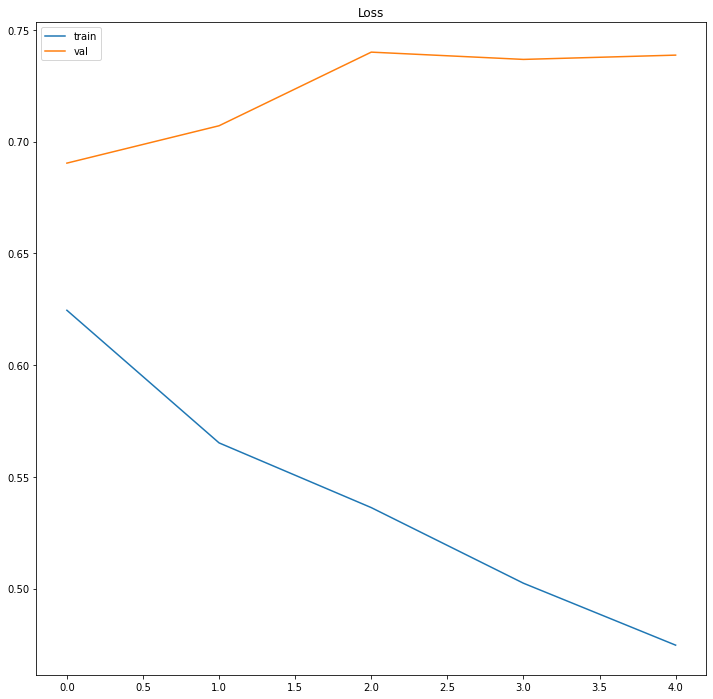

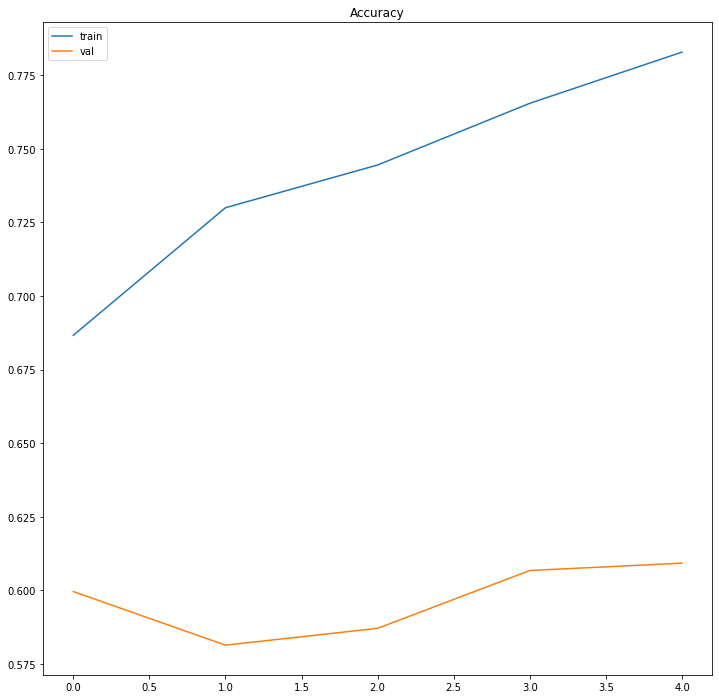

In [100]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# LSTM With FASTTEXT Embedding

In [103]:
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input#, LSTM, Bidirectional
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Flatten, LSTM
from tensorflow.keras.preprocessing import sequence#, text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import Callback


from gensim.models.keyedvectors import KeyedVectors

from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix as confmat,
    classification_report as creport
)

In [104]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding,GRU,LSTM,Dense,Dropout,Bidirectional,BatchNormalization,GlobalMaxPooling1D,Flatten, GlobalAveragePooling1D, MaxPooling1D,SpatialDropout1D,Input,Activation,concatenate,Conv1D
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.initializers import Constant
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,f1_score
import csv
import collections
import numpy as np
import tensorflow as tf

In [24]:
data

,Comment,is_off
0,شوف حد ايران,1
1,شوف تيفي قوداتها الجن غي بلاتي يجي مكه,0
2,عجب يتفاوظون شعوب عربيه وعليهم وهيلا تعلم,0
3,هه هاد شوف تيفي اللي حطت مشا,0
4,الرزق ياتي تدري 🙌🏻❤️,0
...,...,...
13995,وانشا حنا مسلمين كلاب اس هادا اشي كيعلوا اولاد...,1
13996,《 واذا قيل اتق الله اخذته العزه بالاثم فحسبه ج...,0
13997,الله يرضي عليكون زهران علوش وابو النصر متهمين ...,0
13998,الفلوس دفعوها خلصت كله بثمنه عايزين تدخل اكبر ...,0


In [116]:
max_words = 10000 #frequency of words to be kept
max_len = 85

In [117]:
num_words = min(max_words, len(word_index)) + 1
print(num_words)

10001


In [118]:
embed_size=300
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(max_words, len(word_index))
    embedding_matrix = np.zeros((nb_words + 1, embed_size))
    for word, i in word_index.items():
        if i >= max_words:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [119]:
embeddings=build_matrix('./bin/fasttext/cc.ar.300.vec', word_index)
embeddings.shape

(10001, 300)

In [ ]:
lstm_model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))

In [120]:
inp = Input(shape=(max_len,))
x = Embedding(num_words,embed_size,embeddings_initializer=Constant(embeddings),input_length=max_len,trainable=False)(inp)
x = SpatialDropout1D(0.1)(x)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x, x_h, x_c = Bidirectional(GRU(50, return_sequences=True, return_state = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, x_h, max_pool])
outp = Dense(1, activation="sigmoid")(conc)    
gru_model = Model(inputs=inp, outputs=outp)
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [121]:
gru_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 85)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 85, 300)      3000300     input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 85, 300)      0           embedding_4[0][0]                
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 85, 100)      140400      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [122]:
gru_model.fit(x_train,y_train, batch_size=16, epochs=10, verbose=2, validation_data=(x_validate,y_validate))

Epoch 1/10


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  indices[14,76] = 30086 is not in [0, 10001)
	 [[node model_2/embedding_4/embedding_lookup (defined at <ipython-input-122-8551f2ff5926>:1) ]]
  (1) Invalid argument:  indices[14,76] = 30086 is not in [0, 10001)
	 [[node model_2/embedding_4/embedding_lookup (defined at <ipython-input-122-8551f2ff5926>:1) ]]
	 [[model_2/embedding_4/embedding_lookup/_8]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_87167]

Errors may have originated from an input operation.
Input Source operations connected to node model_2/embedding_4/embedding_lookup:
 model_2/embedding_4/embedding_lookup/83826 (defined at /usr/lib/python3.8/contextlib.py:113)

Input Source operations connected to node model_2/embedding_4/embedding_lookup:
 model_2/embedding_4/embedding_lookup/83826 (defined at /usr/lib/python3.8/contextlib.py:113)

Function call stack:
train_function -> train_function
